# **Coral Reef AI**

## Objectives

* To investigate where Coral Reefs are located globally and to understand the conditions that determine their ecosystem health status in various regions.

The Kaggle dataset called "Corals Worldwide Distribution", was used as raw data and saved under the raw folder, [here]( https://www.kaggle.com/datasets/natalialimanska/corals-worldwide-distribution/data) is the link to the Kaggle website.

## Inputs

* The input was "corals_worldwide_dataset.csv"

## Outputs

* The output was "corals_worldwide_dataset_cleaned.csv"


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/danielledelouw/Documents/code_institute/Coral_Reef_AI/Coral_Reef_AI/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/Users/danielledelouw/Documents/code_institute/Coral_Reef_AI/Coral_Reef_AI'

# Section 1

In [9]:
#Load python libraries
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

Section 1  Extraction: Load the Dataset

In [10]:
#read csv
print("Loading Corals Worldwide Dataset data")
df = pd.read_csv('Dataset/raw/corals_worldwide_dataset.csv')
df

Loading Corals Worldwide Dataset data


,name,salinity,January_temp,June_temp,area,latitude,longitude,type of sea,corals,silt/sulfide
0,Adriatic Sea,38.298527,15.658799,20.855299,138000,43,15,2,1,0
1,Adriatic Sea,38.304909,16.297098,19.501200,138000,43,15,2,1,0
2,Adriatic Sea,38.462040,16.251598,19.028500,138000,43,15,2,1,0
3,Adriatic Sea,38.121601,15.709500,22.882999,138000,43,15,2,1,0
4,Adriatic Sea,38.519196,15.733400,21.824799,138000,43,15,2,1,0
...,...,...,...,...,...,...,...,...,...,...
2446,Yellow Sea,31.611076,8.349999,19.500000,380000,38,123,3,0,1
2447,Yellow Sea,31.468084,8.441801,19.800000,380000,38,123,3,0,1
2448,Yellow Sea,31.600788,8.432699,20.700000,380000,38,123,3,0,1
2449,Yellow Sea,31.533226,8.102799,19.000000,380000,38,123,3,0,1


In [ ]:
#  Initial Inspection
print(f"Initial shape:", df.shape)
print(df.head())

# The columns type of sea, corals and silt/sulfide are already 
# encoded as integers. No need for encoding.

# Column descriptions taken from Kaggel:

# name: sea name
# salinity: practical salinity units (PSU) of sea water surface
# January_temp, June_temp: temperature of sea water surface in Celsius degrees
# area: area of sea in square km
# latitude, longitude: coordinates rounded
# types of sea: 1 - enclosed landlocked, 2 - partly enclosed, 3 - marginal, 4 - no land boundaries
# corals: 0 - absence of corals, 1 - presence of corals (Target variable)
# specific bottom: 1 - presence of silt/sulfide, 0 - absence of silt/sulfide

Initial shape: (2451, 10)
           name   salinity  January_temp  June_temp    area  latitude  \
0  Adriatic Sea  38.298527     15.658799  20.855299  138000        43   
1  Adriatic Sea  38.304909     16.297098  19.501200  138000        43   
2  Adriatic Sea  38.462040     16.251598  19.028500  138000        43   
3  Adriatic Sea  38.121601     15.709500  22.882999  138000        43   
4  Adriatic Sea  38.519196     15.733400  21.824799  138000        43   

   longitude  type of sea  corals  silt/sulfide  
0         15            2       1             0  
1         15            2       1             0  
2         15            2       1             0  
3         15            2       1             0  
4         15            2       1             0  


In [22]:
# Check the Column contents, null values, and data types

# This will help us understand the data better and prepare for further analysis.
print("Checking the DataFrame info:") 
df.info()

Checking the DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2451 entries, 0 to 2450
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          2451 non-null   object 
 1   salinity      2451 non-null   float64
 2   January_temp  2451 non-null   float64
 3   June_temp     2451 non-null   float64
 4   area          2451 non-null   int64  
 5   latitude      2451 non-null   int64  
 6   longitude     2451 non-null   int64  
 7   type of sea   2451 non-null   int64  
 8   corals        2451 non-null   int64  
 9   silt/sulfide  2451 non-null   int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 191.6+ KB


In [ ]:
# This section provides descriptive statistics for all numerical 
# columns in the dataset, including measures such as count, mean, 
# standard deviation, minimum, and maximum values. This summary 
# helps to understand the distribution and range of the data, identify 
# potential outliers, and gain insights into the overall characteristics of the dataset.

df.describe(include=[np.number])


,salinity,January_temp,June_temp,area,latitude,longitude,type of sea,corals,silt/sulfide
count,2451.000000,2451.000000,2451.000000,2.451000e+03,2451.000000,2451.000000,2451.000000,2451.000000,2451.000000
mean,32.819880,18.026784,21.612658,1.004778e+06,17.804978,77.937169,2.680131,0.860057,0.039984
std,6.625290,11.069937,10.095466,1.207755e+06,33.877142,53.367369,0.507584,0.346999,0.195961
min,5.933204,-1.899994,-1.899994,1.150000e+04,-68.000000,0.000000,1.000000,0.000000,0.000000
25%,32.870247,7.942601,19.500600,2.800000e+05,-5.000000,28.000000,2.000000,1.000000,0.000000
50%,34.191502,19.670200,24.600000,6.100000e+05,20.000000,65.000000,3.000000,1.000000,0.000000
75%,36.148840,28.238198,29.620199,1.150000e+06,40.000000,125.000000,3.000000,1.000000,0.000000
max,40.000000,30.763500,32.300000,5.695000e+06,76.000000,163.000000,3.000000,1.000000,1.000000


In [20]:
# Check total null valuesif values in dataframe  
df.isnull()
df.isnull().sum()

name            0
salinity        0
January_temp    0
June_temp       0
area            0
latitude        0
longitude       0
type of sea     0
corals          0
silt/sulfide    0
dtype: int64

In [16]:
# Identify duplicate rows
duplicates = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicates)

#there are no duplicate rows

Duplicate Rows:
Empty DataFrame
Columns: [name, salinity, January_temp, June_temp, area, latitude, longitude, type of sea, corals, silt/sulfide]
Index: []


In [19]:
# Check for unique values per column
df.nunique()

name              51
salinity        2421
January_temp     962
June_temp        955
area              49
latitude          40
longitude         47
type of sea        3
corals             2
silt/sulfide       2
dtype: int64

In [24]:
# Checking data types
df.dtypes

name             object
salinity        float64
January_temp    float64
June_temp       float64
area              int64
latitude          int64
longitude         int64
type of sea       int64
corals            int64
silt/sulfide      int64
dtype: object

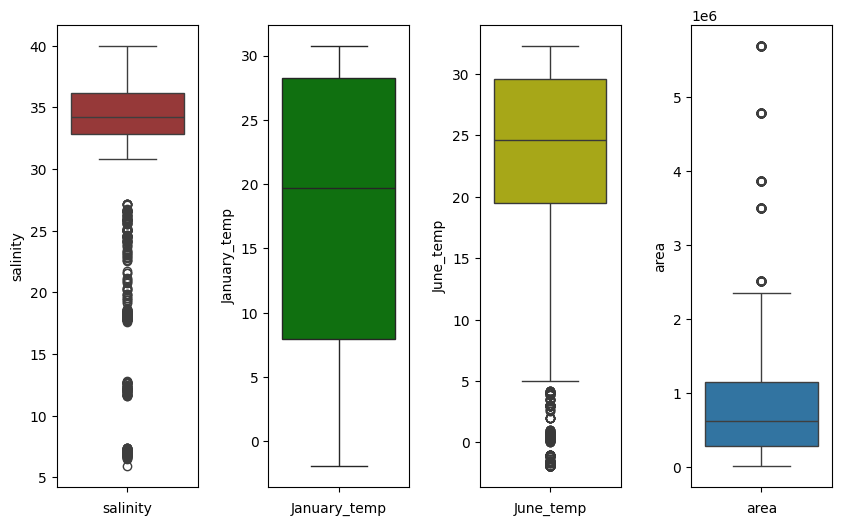

In [ ]:
#boxplots
# initialize figure with 4 subplots in a row
fig, ax = plt.subplots(1, 4, figsize=(10, 6))
 
# add padding between the subplots
plt.subplots_adjust(wspace=0.5) 
 
# draw boxplot for salinity in the 1st subplot
sns.boxplot(data=df['salinity'], ax=ax[0], color='brown',)
ax[0].set_xlabel('salinity')
 
# draw boxplot for January_temp in the 2nd subplot
sns.boxplot(data=df['January_temp'], ax=ax[1], color='g')
ax[1].set_xlabel('January_temp')
 
# draw boxplot for June_temp in the 3rd subplot
sns.boxplot(data=df['June_temp'], ax=ax[2], color='y')
ax[2].set_xlabel('June_temp')
 
# finally draw boxplot for area in the 4th subplot
sns.boxplot(data=df['area'], ax=ax[3])
ax[3].set_xlabel('area')
 

# remove it by setting it to empty list
for subplot in ax:
    subplot.set_xticklabels([])
    
plt.show()

In [ ]:
df_sorted_salinity = df.sort_values(by='salinity', ascending=True) #sorting salinity values ascending
df_sorted_salinity.head(10)
# corals: 0 - absence of corals, 1 - presence of corals
# I am keeping the outliers in the column salinity as they 
# represent where the corals are absent, which is important data

,name,salinity,January_temp,June_temp,area,latitude,longitude,type of sea,corals,silt/sulfide
326,Baltic Sea,5.933204,4.961601,14.279199,377000,58,20,2,0,0
327,Baltic Sea,6.466905,5.477399,9.425598,377000,58,20,2,0,0
311,Baltic Sea,6.562333,5.100400,10.904599,377000,58,20,2,0,0
332,Baltic Sea,6.573896,5.331600,9.298100,377000,58,20,2,0,0
308,Baltic Sea,6.604097,4.980000,10.146399,377000,58,20,2,0,0
309,Baltic Sea,6.641613,5.203099,9.505800,377000,58,20,2,0,0
313,Baltic Sea,6.646228,5.026701,10.216198,377000,58,20,2,0,0
328,Baltic Sea,6.722073,4.980000,10.146399,377000,58,20,2,0,0
314,Baltic Sea,6.724819,5.050799,10.165199,377000,58,20,2,0,0
320,Baltic Sea,6.735662,4.951900,11.637699,377000,58,20,2,0,0


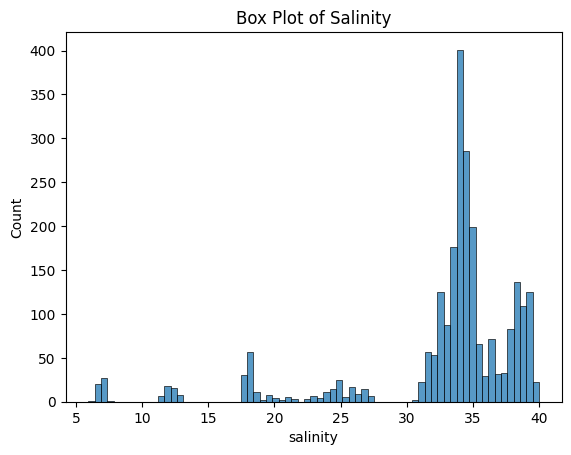

In [ ]:
# salinity histogram plot of values
sns.histplot(df, x=df['salinity'])
plt.title('Box Plot of Salinity')
plt.show()
# they are not normally distributed, which is information I want 
# to use to understand the salt content of various locations of coral reefs

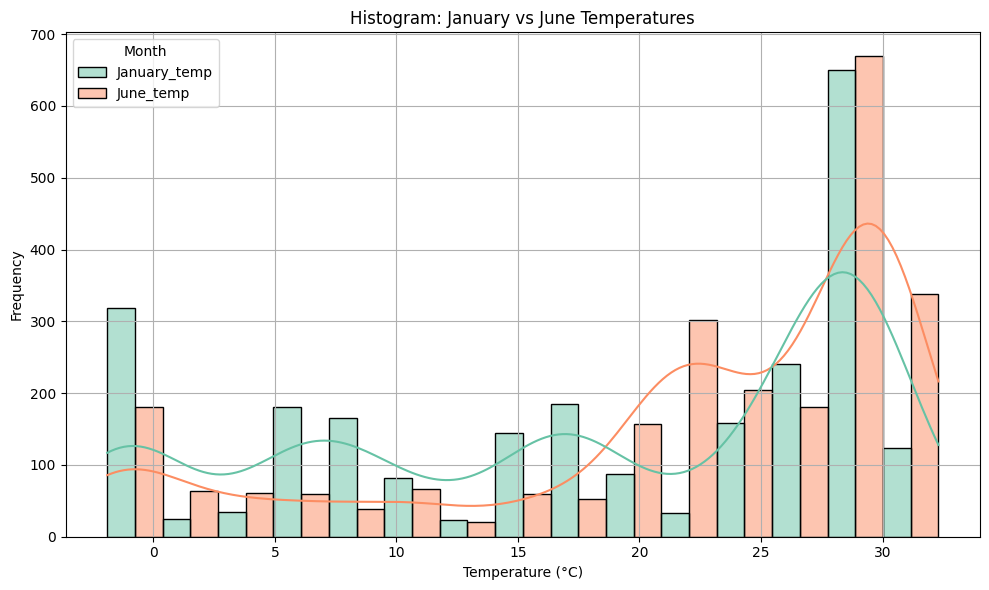

In [ ]:
# Melt data for easier plotting
df_melted = df[['January_temp', 'June_temp']].melt(var_name='Month', value_name='Temperature')

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(data=df_melted, x='Temperature', hue='Month', bins=15, kde=True, multiple='dodge', palette='Set2')

plt.title('Histogram: January vs June Temperatures')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# there are more January temperature data compared to June data, 
# my assumption is that is due to rainy season restrictions as there 
# might be monsoons and storms that hinder data collection.
# these are not normally distributed

In [ ]:
# Check the contents of a few columns:
contents_of_columns = ['name','corals','silt/sulfide','type of sea']
for col in contents_of_columns:
    print(f"\n{col} ({df[col].nunique()} unique values):")
    print(df[col].unique())

# name indicates the sea name, corals 0=absent and 1=present, 
# silt and sulfide 0=absent and 1=present, type of sea only has 
# 3 values where Kaggel indicates a possibility of 4 types: 1 = enclosed landlocked, 2 = partly enclosed, 3 = marginal, 4 = no land boundaries(not included)


name (51 unique values):
['Adriatic Sea' 'Aegean Sea' 'Andaman Sea' 'Arabian Sea' 'Arafura Sea'
 'Balearic Sea' 'Baltic Sea' 'Banda Sea' 'Barents Sea' 'Bay of Bengal'
 'Black Sea' 'Caspian Sea' 'Celebes Sea' 'Coral Sea' 'Cosmonauts Sea'
 'East China Sea' 'East Siberian Sea' 'Flores Sea' 'Gulf of Aden'
 'Gulf of Carpentaria' 'Gulf of Guinea' 'Gulf of Thailand' 'Ionian Sea'
 'Java Sea' 'Laccadive Sea' 'Laptev Sea' 'Lazarev Sea' 'Levantine Sea'
 'Libyan Sea' 'Mediterranean Sea' 'Molucca Sea' 'Mozambique Channel'
 'North Sea' 'Norwegian Sea' 'Oman Sea' 'Persian Gulf' 'Philippine Sea'
 'Red Sea' 'Riiser-Larsen Sea' 'Sea of Azov' 'Sea of Japan'
 'Sea of Marmara' 'Sea of Okhotsk' 'Solomon Sea' 'Somov Sea'
 'South China Sea' 'Sulu Sea' 'Tasman Sea' 'Timor Sea' 'Tyrrhenian Sea'
 'Yellow Sea']

corals (2 unique values):
[1 0]

silt/sulfide (2 unique values):
[0 1]

type of sea (3 unique values):
[2 3 1]


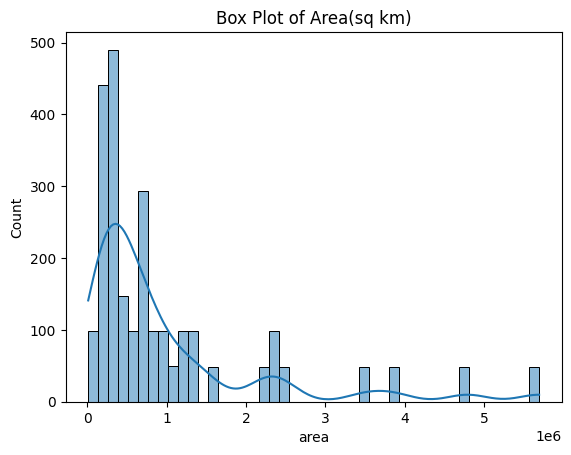

In [ ]:
# area histogram plot of values
sns.histplot(df, x=df['area'],kde=True)
plt.title('Box Plot of Area(sq km)')
plt.show()

# most of the coral reefs are small in size under 
# 1 sq km, whereas the larger coral reefs in size there are less of them in frequency/count 

In [ ]:
# sorting area values descending to check if 
corals are present, which they are, so this is not an outlier
df_sorted_area = df.sort_values(by='area', ascending=False) #sorting area values descending
df_sorted_area.head(20)

,name,salinity,January_temp,June_temp,area,latitude,longitude,type of sea,corals,silt/sulfide
1784,Philippine Sea,34.541790,25.202600,29.889900,5695000,20,130,3,1,0
1799,Philippine Sea,34.733047,26.106798,29.858198,5695000,20,130,3,1,0
1798,Philippine Sea,34.197224,26.273899,30.258799,5695000,20,130,3,1,0
1779,Philippine Sea,34.707809,26.106798,29.858198,5695000,20,130,3,1,0
1802,Philippine Sea,34.721592,25.332600,30.205000,5695000,20,130,3,1,0
1801,Philippine Sea,34.363586,25.173601,30.046801,5695000,20,130,3,1,0
1800,Philippine Sea,34.706001,25.368900,29.904600,5695000,20,130,3,1,0
1803,Philippine Sea,34.392509,26.269096,30.131098,5695000,20,130,3,1,0
1808,Philippine Sea,34.425827,25.308399,29.937201,5695000,20,130,3,1,0
1805,Philippine Sea,34.202377,26.511000,29.815798,5695000,20,130,3,1,0


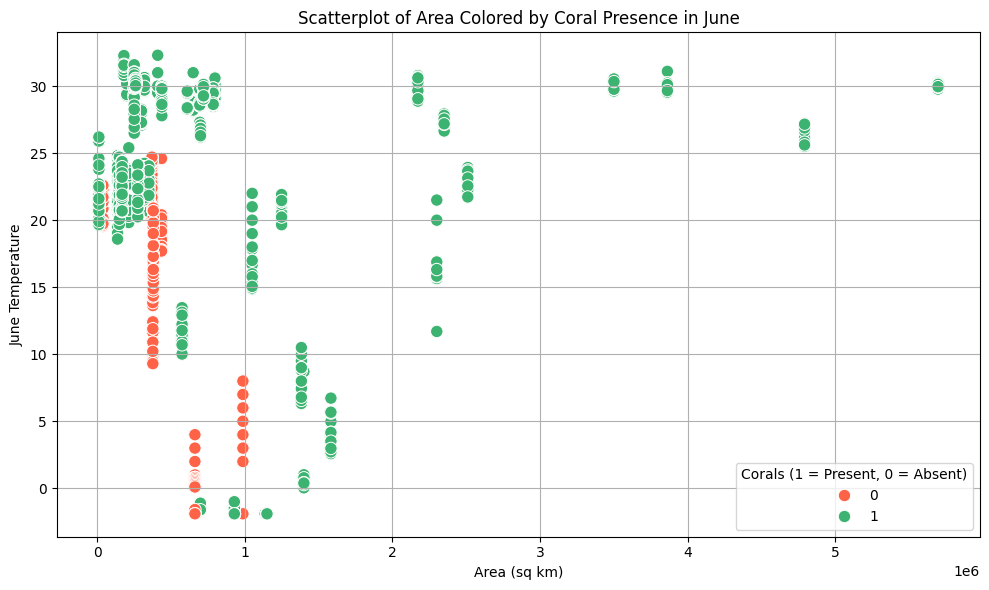

In [ ]:
# Checking outliers for area data in June
# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='area',
    y='June_temp',  
    hue='corals',   # Color based on coral presence
    palette={0: 'tomato', 1: 'mediumseagreen'},  # 0 = red, 1 = green
    s=80
)

# Aesthetics
plt.title('Scatterplot of Area Colored by Coral Presence in June')
plt.xlabel('Area (sq km)')
plt.ylabel('June Temperature')  # Update if using a different y-axis
plt.legend(title='Corals (1 = Present, 0 = Absent)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Corals are shown in the plot below in small 
# and large areas therefore I will not remove them as outliers
# note: June has higher temperatures where no 
# corals are present with a size below 1 sq km

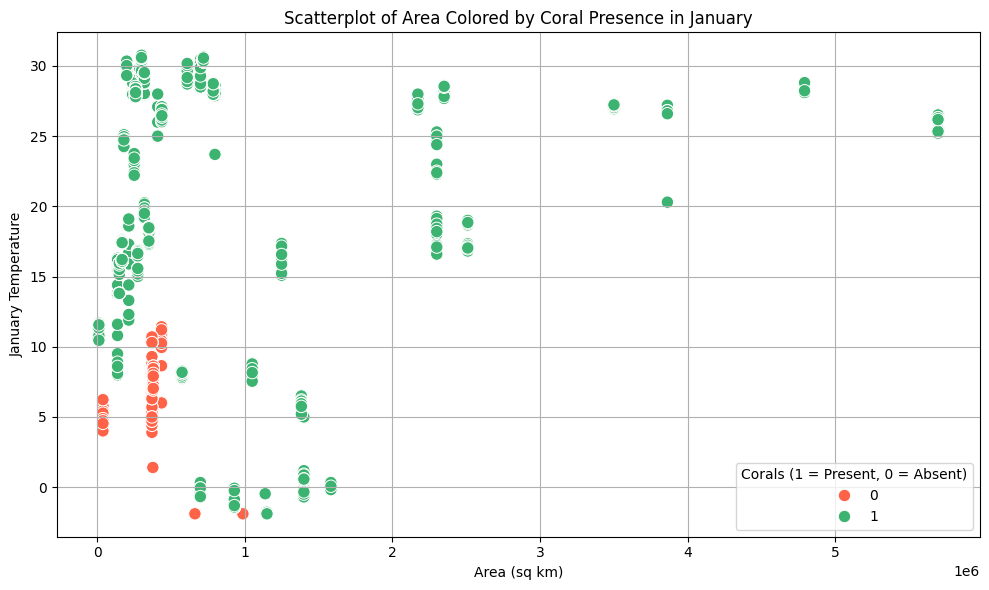

In [ ]:
# Checking outliers for area data in January
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='area',
    y='January_temp',  
    hue='corals',   # Color based on coral presence
    palette={0: 'tomato', 1: 'mediumseagreen'},  # 0 = red, 1 = green
    s=80
)

# Aesthetics
plt.title('Scatterplot of Area Colored by Coral Presence in January')
plt.xlabel('Area (sq km)')
plt.ylabel('January Temperature')  # Update if using a different y-axis
plt.legend(title='Corals (1 = Present, 0 = Absent)')
plt.grid(True)
plt.tight_layout()
plt.show()

# note: January has lower temperatures where no 
# corals are present with a size below 1 sq km

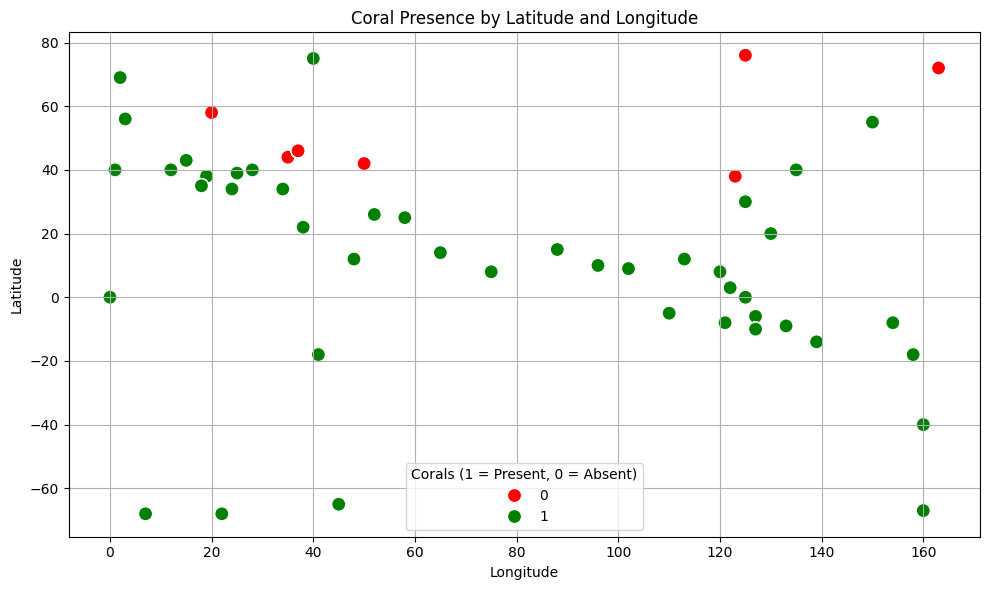

In [ ]:
#plotting latitude and longitude with corals presence
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='longitude',
    y='latitude',
    hue='corals',
    palette={0: 'red', 1: 'green'},  # Red = No coral, Green = Coral
    s=100
)

# Add titles and labels
plt.title('Coral Presence by Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Corals (1 = Present, 0 = Absent)')
plt.grid(True)
plt.tight_layout()
plt.show()

# corals exist even at high latitudes above 60 degrees and at lower 
# latitudes below -60 degrees, therefore this is not an outlier

In [50]:
# Renaming column names for consistency
df.rename(columns={'type of sea': 'type_of_sea', 'silt/sulfide': 'silt_or_sulfide'}, inplace=True)
print(df)

              name   salinity  January_temp  June_temp    area  latitude  \
0     Adriatic Sea  38.298527     15.658799  20.855299  138000        43   
1     Adriatic Sea  38.304909     16.297098  19.501200  138000        43   
2     Adriatic Sea  38.462040     16.251598  19.028500  138000        43   
3     Adriatic Sea  38.121601     15.709500  22.882999  138000        43   
4     Adriatic Sea  38.519196     15.733400  21.824799  138000        43   
...            ...        ...           ...        ...     ...       ...   
2446    Yellow Sea  31.611076      8.349999  19.500000  380000        38   
2447    Yellow Sea  31.468084      8.441801  19.800000  380000        38   
2448    Yellow Sea  31.600788      8.432699  20.700000  380000        38   
2449    Yellow Sea  31.533226      8.102799  19.000000  380000        38   
2450    Yellow Sea  30.992769      7.899599  20.700000  380000        38   

      longitude  type_of_sea  corals  silt_or_sulfide  
0            15            2   

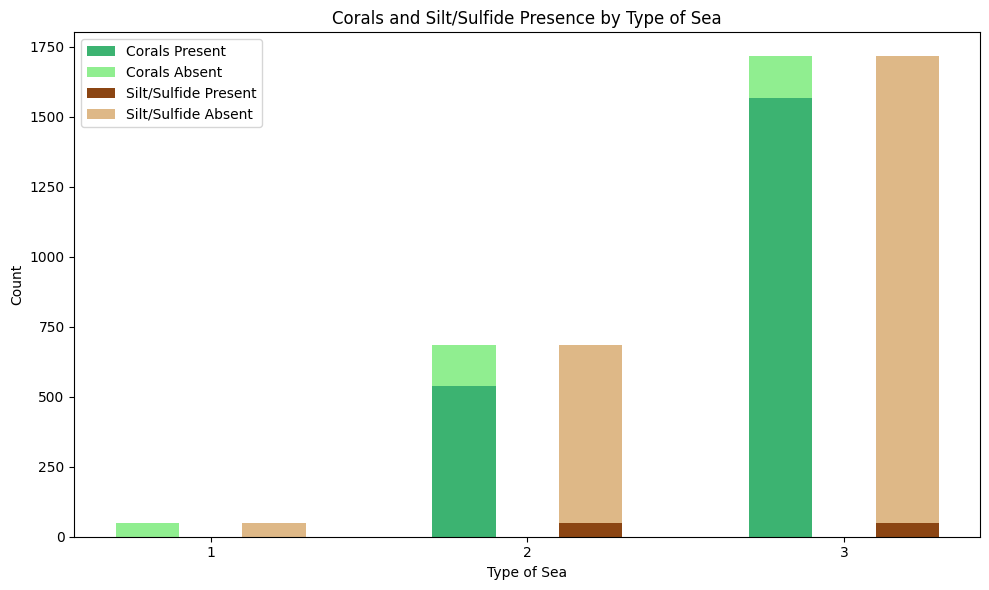

In [ ]:
# The stacked bar chart shows the presence and absence of corals and silt/sulfide by type of sea.
# Prepare data for plotting
type_sea_counts = pd.DataFrame({
    'type_of_sea': df['type_of_sea'].unique()
}).sort_values('type_of_sea')

type_sea_counts['corals_present'] = df[df['corals'] == 1].groupby('type_of_sea').size().reindex(type_sea_counts['type_of_sea'], fill_value=0).values
type_sea_counts['corals_absent'] = df[df['corals'] == 0].groupby('type_of_sea').size().reindex(type_sea_counts['type_of_sea'], fill_value=0).values
type_sea_counts['silt_or_sulfide_present'] = df[df['silt_or_sulfide'] == 1].groupby('type_of_sea').size().reindex(type_sea_counts['type_of_sea'], fill_value=0).values
type_sea_counts['silt_or_sulfide_absent'] = df[df['silt_or_sulfide'] == 0].groupby('type_of_sea').size().reindex(type_sea_counts['type_of_sea'], fill_value=0).values

x = np.arange(len(type_sea_counts['type_of_sea']))
bar_width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

# Corals present/absent
ax.bar(x - bar_width, type_sea_counts['corals_present'], width=bar_width, label='Corals Present', color='mediumseagreen')
ax.bar(x - bar_width, type_sea_counts['corals_absent'], width=bar_width, bottom=type_sea_counts['corals_present'], label='Corals Absent', color='lightgreen')

# Silt/sulfide present/absent
ax.bar(x + bar_width, type_sea_counts['silt_or_sulfide_present'], width=bar_width, label='Silt/Sulfide Present', color='saddlebrown')
ax.bar(x + bar_width, type_sea_counts['silt_or_sulfide_absent'], width=bar_width, bottom=type_sea_counts['silt_or_sulfide_present'], label='Silt/Sulfide Absent', color='burlywood')

ax.set_xlabel('Type of Sea')
ax.set_ylabel('Count')
ax.set_title('Corals and Silt/Sulfide Presence by Type of Sea')
ax.set_xticks(x)
ax.set_xticklabels(type_sea_counts['type_of_sea'])
ax.legend()
plt.tight_layout()
plt.show()

#Numerical lables for types of sea: 1 - enclosed landlocked, 2 - partly enclosed, 
# 3 - marginal, 4 - no land boundaries(there is no data for no. 4)

# No outliers present in Silt_or_Sulfide column and Type_of_Sea column, I choose to keep them as they are

In [ ]:
#Load Data to Dataset/cleaned:
#df.to_csv('Dataset/cleaned/corals_worldwide_dataset_cleaned.csv', index=False)

---

# Section 2

Section 2 content

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
